In [8]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import *
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../data/Week1_challenge_data_source.csv')
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


Extracting only the experience metrics

In [5]:
df_experience = df[['MSISDN/Number','Handset Type','Avg RTT DL (ms)','Avg RTT UL (ms)',
                 'TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)',
                 'Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)']]
df_experience.head()

,MSISDN/Number,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
0,3.366496e+10,Samsung Galaxy A5 Sm-A520F,42.0,5.0,NaN,NaN,23.0,44.0
1,3.368185e+10,Samsung Galaxy J5 (Sm-J530),65.0,5.0,NaN,NaN,16.0,26.0
2,3.376063e+10,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,6.0,9.0
3,3.375034e+10,undefined,NaN,NaN,NaN,NaN,44.0,44.0
4,3.369980e+10,Samsung Sm-G390F,NaN,NaN,NaN,NaN,6.0,9.0


In [6]:
df_experience.isnull().sum(axis=0)

MSISDN/Number                   1066
Handset Type                     572
Avg RTT DL (ms)                27829
Avg RTT UL (ms)                27812
TCP DL Retrans. Vol (Bytes)    88146
TCP UL Retrans. Vol (Bytes)    96649
Avg Bearer TP DL (kbps)            1
Avg Bearer TP UL (kbps)            1
dtype: int64

In [9]:
df_experience['Avg RTT DL (ms)'].fillna(value=df_experience['Avg RTT DL (ms)'].mean(), inplace=True)
df_experience['Avg RTT UL (ms)'].fillna(value=df_experience['Avg RTT UL (ms)'].mean(), inplace=True)
df_experience['TCP DL Retrans. Vol (Bytes)'].fillna(value=df_experience['TCP DL Retrans. Vol (Bytes)'].mean(), inplace=True)
df_experience['TCP UL Retrans. Vol (Bytes)'].fillna(value=df_experience['TCP UL Retrans. Vol (Bytes)'].mean(), inplace=True)
df_experience['Avg Bearer TP DL (kbps)'].fillna(value=df_experience['Avg Bearer TP DL (kbps)'].mean(), inplace=True)
df_experience['Avg Bearer TP UL (kbps)'].fillna(value=df_experience['Avg Bearer TP UL (kbps)'].mean(), inplace=True)
df_experience['Handset Type'].fillna(value=df_experience['Handset Type'].mode().iloc[0], inplace=True)
df_experience['MSISDN/Number'].fillna(value=df_experience['MSISDN/Number'].mode().iloc[0], inplace=True)

In [10]:
df_experience.isnull().sum(axis=0)

MSISDN/Number                  0
Handset Type                   0
Avg RTT DL (ms)                0
Avg RTT UL (ms)                0
TCP DL Retrans. Vol (Bytes)    0
TCP UL Retrans. Vol (Bytes)    0
Avg Bearer TP DL (kbps)        0
Avg Bearer TP UL (kbps)        0
dtype: int64

In [12]:
def get_median(col):
    return df_experience[col].median()


54.0

In [19]:
def replace_outliers(col, val, median):
    df_experience[col] = np.where(df_experience[col] > val, median, df_experience[col])

cols_to_fix = [
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)']

for col in cols_to_fix:
    replace_outliers(col, df_experience[col].quantile(0.75), get_median(col))

Aggregate per customer

In [20]:
df_experience.describe()

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
count,1.500010e+05,150001.000000,150001.000000,1.500010e+05,150001.000000,150001.000000,150001.000000
mean,4.182414e+10,58.417629,7.724229,1.375607e+07,525524.011858,1448.715389,143.040546
std,2.438731e+12,29.890485,5.749736,9.343134e+06,335154.724475,3970.143858,229.539489
min,3.360100e+10,0.000000,0.000000,2.000000e+00,1.000000,0.000000,0.000000
25%,3.365094e+10,35.000000,3.000000,1.332932e+06,63009.000000,43.000000,47.000000
50%,3.366361e+10,54.000000,7.000000,2.080991e+07,759658.664811,63.000000,63.000000
75%,3.368307e+10,76.000000,11.000000,2.080991e+07,759658.664811,63.000000,63.000000
max,8.823970e+14,109.795706,17.662883,2.080991e+07,759658.664811,19710.000000,1120.000000


Compute and list 10 of the top, bottom and most frequent TCP, RTT and Throughput

Add upload and download datas:

In [21]:
df_experience['Total RTT'] = df_experience['Avg RTT UL (ms)']+df_experience['Avg RTT DL (ms)']
df_experience['Total TCP']=df_experience['TCP DL Retrans. Vol (Bytes)']+df_experience['TCP UL Retrans. Vol (Bytes)']
df_experience['Total throughput']=df_experience['Avg Bearer TP DL (kbps)']+df_experience['Avg Bearer TP DL (kbps)']


In [22]:
df_experience.head()

,MSISDN/Number,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Total RTT,Total TCP,Total throughput
0,3.366496e+10,Samsung Galaxy A5 Sm-A520F,42.000000,5.000000,2.080991e+07,759658.664811,23.0,44.0,47.000000,2.156957e+07,46.0
1,3.368185e+10,Samsung Galaxy J5 (Sm-J530),65.000000,5.000000,2.080991e+07,759658.664811,16.0,26.0,70.000000,2.156957e+07,32.0
2,3.376063e+10,Samsung Galaxy A8 (2018),109.795706,17.662883,2.080991e+07,759658.664811,6.0,9.0,127.458589,2.156957e+07,12.0
3,3.375034e+10,undefined,109.795706,17.662883,2.080991e+07,759658.664811,44.0,44.0,127.458589,2.156957e+07,88.0
4,3.369980e+10,Samsung Sm-G390F,109.795706,17.662883,2.080991e+07,759658.664811,6.0,9.0,127.458589,2.156957e+07,12.0


In [33]:
df_added = df_experience[['MSISDN/Number','Handset Type','Total RTT',
                   'Total TCP','Total throughput']]
df_added.head()

,MSISDN/Number,Handset Type,Total RTT,Total TCP,Total throughput
0,3.366496e+10,Samsung Galaxy A5 Sm-A520F,47.000000,2.156957e+07,46.0
1,3.368185e+10,Samsung Galaxy J5 (Sm-J530),70.000000,2.156957e+07,32.0
2,3.376063e+10,Samsung Galaxy A8 (2018),127.458589,2.156957e+07,12.0
3,3.375034e+10,undefined,127.458589,2.156957e+07,88.0
4,3.369980e+10,Samsung Sm-G390F,127.458589,2.156957e+07,12.0


Top 10 TCP

In [51]:
sortTCP = df_added['Total TCP'].sort_values(ascending=False)
sortTCP.head(10).to_frame()

,Total TCP
0,2.156957e+07
87119,2.156957e+07
87141,2.156957e+07
87140,2.156957e+07
87138,2.156957e+07
87137,2.156957e+07
87136,2.156957e+07
87135,2.156957e+07
87134,2.156957e+07
87133,2.156957e+07


Least 10 TCP

In [50]:
sortTCP.tail(10).to_frame()

,Total TCP
12849,143.0
83214,134.0
95955,134.0
99947,129.0
8794,128.0
97061,113.0
13142,108.0
18417,106.0
111100,97.0
143594,86.0


Get Most Frequent Value Function

In [43]:
def get_most_freq(col):
    most_freq = df_experience[col].value_counts().index.tolist()
    df1 = pd.DataFrame(most_freq)
    return df1.head(10)
    

Most Frequent TCP

In [44]:
get_most_freq('Total TCP')

,0
0,2.156957e+07
1,2.081121e+07
2,2.081124e+07
3,7.609887e+05
4,2.081123e+07
5,7.596967e+05
6,7.597507e+05
7,7.623187e+05
8,2.081257e+07
9,7.609767e+05


Top 10 RTT

In [49]:
sortRTT = df_added['Total RTT'].sort_values(ascending=False)
sortRTT.head(10).to_frame()

,Total RTT
150000,127.458589
47341,127.458589
125937,127.458589
47325,127.458589
47327,127.458589
125931,127.458589
125930,127.458589
125924,127.458589
125921,127.458589
125920,127.458589


Least 10 RTT

In [48]:
sortRTT.tail(10).to_frame()

,Total RTT
8756,6.0
123210,6.0
103544,5.0
50966,4.0
144923,4.0
71738,2.0
143878,0.0
42602,0.0
124538,0.0
103321,0.0


Most Frequent RTT

In [47]:
get_most_freq('Total RTT')

,0
0,127.458589
1,61.000000
2,29.000000
3,39.000000
4,38.000000
5,59.000000
6,40.000000
7,30.000000
8,28.000000
9,49.000000


Top 10 Throughput

In [52]:
sortThrough = df_added['Total throughput'].sort_values(ascending=False)
sortThrough.head(10).to_frame()

,Total throughput
17474,39420.0
137973,39416.0
120397,39412.0
49230,39412.0
79031,39412.0
139058,39410.0
135885,39408.0
14507,39406.0
40655,39406.0
118898,39404.0


Least 10 Throughput

In [53]:
sortThrough.tail(10)

1176      0.0
87845     0.0
87848     0.0
102243    0.0
56180     0.0
115502    0.0
87979     0.0
87982     0.0
104943    0.0
90980     0.0
Name: Total throughput, dtype: float64

Most Frequent Throughput

In [54]:
get_most_freq('Total throughput')

,0
0,126.0
1,46.0
2,86.0
3,88.0
4,12.0
5,44.0
6,96.0
7,84.0
8,90.0
9,94.0


The distribution of the average throughput  per handset type

In [56]:
df_added.head()

,MSISDN/Number,Handset Type,Total RTT,Total TCP,Total throughput
0,3.366496e+10,Samsung Galaxy A5 Sm-A520F,47.000000,2.156957e+07,46.0
1,3.368185e+10,Samsung Galaxy J5 (Sm-J530),70.000000,2.156957e+07,32.0
2,3.376063e+10,Samsung Galaxy A8 (2018),127.458589,2.156957e+07,12.0
3,3.375034e+10,undefined,127.458589,2.156957e+07,88.0
4,3.369980e+10,Samsung Sm-G390F,127.458589,2.156957e+07,12.0


In [64]:
df_added.sort_values(by=['Total throughput'], ascending=False, inplace=True)

In [74]:
total_through = df_added.groupby('Handset Type')['Total throughput'].sum()
total_through.sort_values(ascending=False).to_frame().head(10)

,Total throughput
Handset Type,
Huawei B528S-23A,9.604710e+07
Apple iPhone 6 (A1586),2.215854e+07
undefined,1.962744e+07
Apple iPhone 6S (A1688),1.616574e+07
Huawei E5180,1.416909e+07
Apple iPhone 7 (A1778),1.302503e+07
Samsung Galaxy S8 (Sm-G950F),1.186592e+07
Apple iPhone Se (A1723),1.028026e+07
Samsung Galaxy A5 Sm-A520F,9.116160e+06


Therefore the above top 3 (Huawei B528S-23A, Apple iPhone 6 (A1586)., undefined brand) has a capacity of high internet speed adaptability.

The average TCP retransmission view per handset type

In [77]:
total_tcp = df_added.groupby('Handset Type')['Total TCP'].sum()
tcp=total_tcp.sort_values(ascending=True).to_frame().head(10)
tcp

,Total TCP
Handset Type,
Casper Bilgisaya. Via M1,360.0
Samsung Galaxy Note 8 (Sm-N9500),418.0
Gotron (Hk) Elec. Armor X,1500.0
Lenovo Moto X Play,1817.0
Oppo A37F,2377.0
Samsung Gt-P5220,2400.0
Htc 2Q6E100,2894.0
Lenovo Moto E,3289.0
Tct Mobile Suzho. Alcatel Onetouch Pop C2,3406.0


The above top 3 mobiles (Casper Bilgisaya. Via M1, Samsung Galaxy Note 8 (Sm-N9500), Gotron (Hk) Elec. Armor X) has reliable internet service since they have lower retransmitted data (means lower rate of data loss).

K-means based on the experience metrics

In [78]:
df_added.head()

,MSISDN/Number,Handset Type,Total RTT,Total TCP,Total throughput
17474,3.369885e+10,Samsung Galaxy A6 Sm-A600Fn Ds,78.0,22988.0,39420.0
137973,3.361674e+10,Apple iPhone 6 (A1586),77.0,523572.0,39416.0
120397,3.366291e+10,Huawei B528S-23A,80.0,1274007.0,39412.0
49230,3.361896e+10,Samsung Galaxy A8 (2018),43.0,31355.0,39412.0
79031,3.360980e+10,Apple iPhone Se (A1723),46.0,6982.0,39412.0


Function for Standardizing The data

In [79]:
def standard_data(col):
    standard = pd.DataFrame(df_added[col])
    std_column_values = standard.values
    sta = StandardScaler()
    std_data = sta.fit_transform(std_column_values)
    df_added[col] = std_data
    return df_added[col]

Standardize TCP

In [80]:
standard_data('Total TCP')

17474    -1.489296
137973   -1.437010
120397   -1.358628
49230    -1.488422
79031    -1.490968
            ...   
102243    0.761222
56180     0.761222
115502    0.761222
87979     0.761222
90980     0.761222
Name: Total TCP, Length: 150001, dtype: float64

Standart RTT

In [81]:
standard_data('Total RTT')

17474     0.343917
137973    0.314914
120397    0.401922
49230    -0.671174
79031    -0.584166
            ...   
102243    1.778343
56180     1.778343
115502    1.778343
87979     1.778343
90980     1.778343
Name: Total RTT, Length: 150001, dtype: float64

Standardize Throughput

In [82]:
standard_data('Total throughput')

17474     4.599668
137973    4.599165
120397    4.598661
49230     4.598661
79031     4.598661
            ...   
102243   -0.364904
56180    -0.364904
115502   -0.364904
87979    -0.364904
90980    -0.364904
Name: Total throughput, Length: 150001, dtype: float64

In [84]:
df_experience_standard = df_added[['MSISDN/Number', 'Total TCP', 'Total throughput', 'Total RTT']]
df_experience_standard.head()

,MSISDN/Number,Total TCP,Total throughput,Total RTT
17474,3.369885e+10,-1.489296,4.599668,0.343917
137973,3.361674e+10,-1.437010,4.599165,0.314914
120397,3.366291e+10,-1.358628,4.598661,0.401922
49230,3.361896e+10,-1.488422,4.598661,-0.671174
79031,3.360980e+10,-1.490968,4.598661,-0.584166


In [94]:
df_experience_standard.index = df_experience_standard['MSISDN/Number']
df_experience_standard = df_experience_standard.iloc[:,1:4]
df_experience_standard.head()

,Total TCP,Total throughput,Total RTT
MSISDN/Number,,,
3.369885e+10,-1.489296,4.599668,0.343917
3.361674e+10,-1.437010,4.599165,0.314914
3.366291e+10,-1.358628,4.598661,0.401922
3.361896e+10,-1.488422,4.598661,-0.671174
3.360980e+10,-1.490968,4.598661,-0.584166


In [95]:
kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(df_experience_standard)
cluster = kmeans.predict(df_experience_standard)
df_kclus = pd.DataFrame(df_experience_standard)
df_kclus['cluster'] = cluster
centroids = kmeans.cluster_centers_
labels = np.unique(cluster)

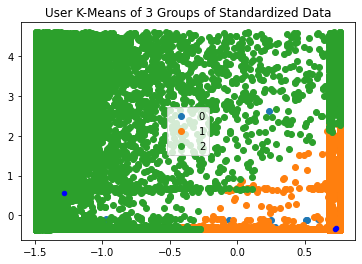

In [98]:
plt.title('User K-Means of 3 Groups of Standardized Data')

plt.scatter(df_kclus[cluster == 0].iloc[:,0] , df_kclus[cluster == 0].iloc[:,1], label = 0)
plt.scatter(df_kclus[cluster == 1].iloc[:,0] , df_kclus[cluster == 1].iloc[:,1], label = 1)
plt.scatter(df_kclus[cluster == 2].iloc[:,0] , df_kclus[cluster == 2].iloc[:,1], label = 2)

plt.scatter(centroids[:,0] , centroids[:,1] , s = 20, color = 'blue')
plt.legend()
plt.show()